In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import re
pd.options.display.max_columns = None
%matplotlib inline
%load_ext autoreload
%autoreload 2

train = pd.read_csv('mydata/twitter_pollster_7_days_train.csv', index_col=0)
train.name = 'train'
test = pd.read_csv('mydata/twitter_pollster_7_days_test.csv', index_col=0)
test.name = 'test'

print(train.shape)
all_train_words = list(train['content'].values)
print(len(all_train_words)) # number of tweets
#all_train_words_as_str = ' '.join(all_train_words)
#print(len(all_train_words_as_str)) # number of char

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1050, 3)
1050


In [82]:
list_of_tweets = [tweet.split() for tweet in all_train_words]

In [89]:
len(list_of_tweets)

1050

In [90]:
def filter_out(starting_str, input_list):
    output_list = []
    for tweet in input_list:
        output_list.append([s for s in tweet if not s.startswith(starting_str)])
    print(len(output_list))
    return output_list

In [84]:
after_removing = filter_out('@', list_of_tweets)

31659


In [85]:
after_removing = filter_out('https://', after_removing)

31659


In [86]:
after_removing = filter_out('.@', after_removing)

31659


In [87]:
after_removing = [s for s in after_removing if any(c.isalpha() for c in s)]
print(len(after_removing))

30602


In [58]:
after_removing = filter_out('the', after_removing)
after_removing = filter_out('a', after_removing)
after_removing = filter_out('to', after_removing)
after_removing = filter_out('to', after_removing)

27151
25451


In [61]:
regex = re.compile('[^a-zA-Z]')
#First parameter is the replacement, second parameter is your input string
after_removing = [regex.sub('', s) for s in after_removing]

In [62]:
after_removing

['SometimesItsOkTo',
 'Be',
 'in',
 'middle',
 'Support',
 'Help',
 'save',
 'our',
 'home',
 'HelpSaveOurHome',
 'Donate',
 'WeNeedAMiracle',
 'ZR',
 'set',
 'up',
 'his',
 'GoodVsEvil',
 'project',
 'with',
 'surprise',
 'EP',
 'ValleyOfTheKXNGS',
 'To',
 'Sell',
 'or',
 'Not',
 'to',
 'Sell',
 'The',
 'Indie',
 'Artists',
 'Dilema',
 'Fatima',
 'Siad',
 'by',
 'Itaysha',
 'Jordan',
 'for',
 'Arise',
 'Magazine',
 'How',
 'to',
 'Put',
 'Together',
 'Small',
 'Tour',
 'KPWR',
 'Power',
 'Los',
 'Angeles',
 'The',
 'Cruz',
 'Show',
 'Gives',
 'Away',
 'Trump',
 'Tramp',
 'Stamp',
 'The',
 'Clinton',
 'Brand',
 'is',
 'busted',
 'Everybody',
 'Cubs',
 'fan',
 'now',
 'Where',
 'yo',
 'was',
 'when',
 'we',
 'lost',
 'games',
 'DaMVP',
 'SometimesItsOkTo',
 'have',
 'Pumpkin',
 'Pie',
 'am',
 'And',
 'thats',
 'exactly',
 'what',
 'Im',
 'doing',
 'Ceo',
 'Emmett',
 'Dove',
 'Founder',
 'of',
 'has',
 'few',
 'words',
 'in',
 'Magazine',
 'Issue',
 'ThingsThatDisturbMe',
 'Former',
 'TV

In [64]:
words, counts = np.unique(np.array(after_removing), return_counts=True)

In [65]:
order = np.argsort(counts)[::-1]

In [71]:
len(words)

8692

In [67]:
words[order], counts[order]

(array(['to', 'in', 'of', ..., 'Submission', 'Submit', 'zu'], dtype='<U38'),
 array([600, 394, 372, ...,   1,   1,   1]))

In [73]:
words[order][:200]

array(['to', 'in', 'of', 'is', 'for', 'on', 'you', 'I', 'The', 'your',
       'it', 'be', 'with', 'this', 'by', 'Trump', 'that',
       'RejectedDebateTopics', 'my', 'have', 'not', 'was', 'from', 'me',
       'A', 'IslamKills', 'but', 'like', 'via', 'RT', 'Hillary', 'or',
       'more', 'You', 'MakeMeHateYouInOnePhrase', 'do',
       'BetterAlternativeToDebates', 'Im', 'he', 'New', 'out', 'will',
       'up', 'people', 'has', 'NowPlaying', 'dont', 'we', 'who',
       'BlackLivesMatter', 'This', 'now', 'RuinADinnerInOnePhrase', 'how',
       'his', 'just', 'so', 'our', 'her', 'when', 'get', 'can', 'In',
       'one', 'Now', 'what', 'no', 'Black', 'Clinton', 'would', 'than',
       'if', 'know', 'Brussels', 'its', 'Your', 'How', 'Its', 'new',
       'For', 'We', 'Is', 'US', 'why', 'him', 'being', 'too', 'If',
       'black', 'right', 'think', 'What', 'she', 'It', 'us', 'NYPD',
       'here', 'only', 'Man', 'PJNET', 'When', 'refugees', 'were',
       'Playing', 'music', 'many', 'over', 'O

(array([8.552e+03, 8.100e+01, 2.900e+01, 1.000e+01, 3.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1.        ,  20.96666667,  40.93333333,  60.9       ,
         80.86666667, 100.83333333, 120.8       , 140.76666667,
        160.73333333, 180.7       , 200.66666667, 220.63333333,
        240.6       , 260.56666667, 280.53333333, 300.5       ,
        320.46666667, 340.43333333, 360.4       , 380.36666667,
        400.33333333, 420.3       , 440.26666667, 460.23333333,
        480.2       , 500.16666667, 520.13333333, 540.1       ,
        560.06666667, 580.03333333, 600.        ]),
 <a list of 30 Patch objects>)

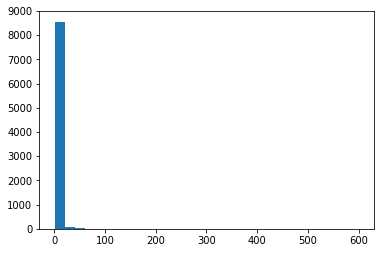

In [69]:
plt.hist(counts, bins=30)